In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

df_yield = pd.read_csv('/content/cpdata.csv')
df_yield.shape

(3100, 5)

In [ ]:
df_yield.head()

,temperature,humidity,ph,rainfall,label
0,20.879744,82.002744,6.502985,202.935536,rice
1,21.770462,80.319644,7.038096,226.655537,rice
2,23.004459,82.320763,7.840207,263.964248,rice
3,26.491096,80.158363,6.980401,242.864034,rice
4,20.130175,81.604873,7.628473,262.717340,rice


In [ ]:
df_yield.tail(10)

,temperature,humidity,ph,rainfall,label
3090,24.693689,85.569676,6.353107,48.993908,watermelon
3091,24.543570,84.608083,6.211749,42.006603,watermelon
3092,25.897623,81.966648,6.277245,54.499601,watermelon
3093,26.633312,84.317568,6.560444,56.318662,watermelon
3094,25.357947,80.458463,6.903020,47.720782,watermelon
3095,25.287846,89.636679,6.765095,58.286977,watermelon
3096,26.638386,84.695469,6.189214,48.324286,watermelon
3097,25.331045,84.305338,6.904242,41.532187,watermelon
3098,26.897502,83.892415,6.463271,43.971937,watermelon
3099,26.986037,89.413849,6.260839,58.548767,watermelon


In [ ]:
df_yield.describe()

,temperature,humidity,ph,rainfall
count,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.108466,66.005312,6.368913,110.213031
std,7.566308,24.007713,0.809477,64.048562
min,8.825675,10.034048,3.504752,20.211267
25%,22.810495,55.244920,5.895343,64.909095
50%,26.102848,68.980529,6.342518,97.057093
75%,29.365644,84.446524,6.841616,141.210784
max,54.986760,99.981876,9.935091,397.315380


In [ ]:
df_yield.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   temperature  3100 non-null   float64
 1   humidity     3100 non-null   float64
 2   ph           3100 non-null   float64
 3   rainfall     3100 non-null   float64
 4   label        3100 non-null   object 
dtypes: float64(4), object(1)
memory usage: 121.2+ KB


Text(0.5, 1.0, 'Multi-Collinearity of CropAttributes')

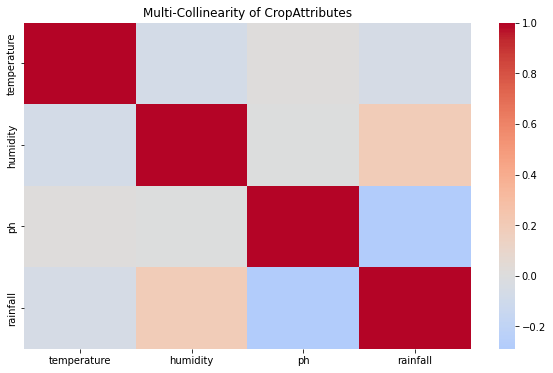

In [ ]:
#heatmap to check null missing values.

fig, ax = plt.subplots(figsize=(10,6))
sns.heatmap(df_yield.corr(), center=0, cmap='coolwarm')
ax.set_title('Multi-Collinearity of CropAttributes')

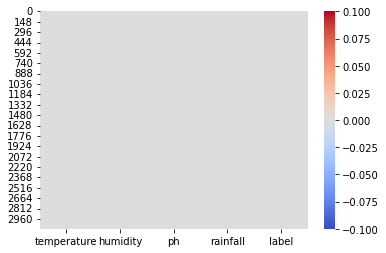

In [ ]:
sns.heatmap(df_yield.isnull(),cmap="coolwarm")
plt.show()

<ipython-input-21-4476e791b65f>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_yield['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
<ipython-input-21-4476e791b65f>:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df_yield['ph'],color="green",bins=15,hist_kws={'alpha':0.2})


<Axes: xlabel='ph', ylabel='Density'>

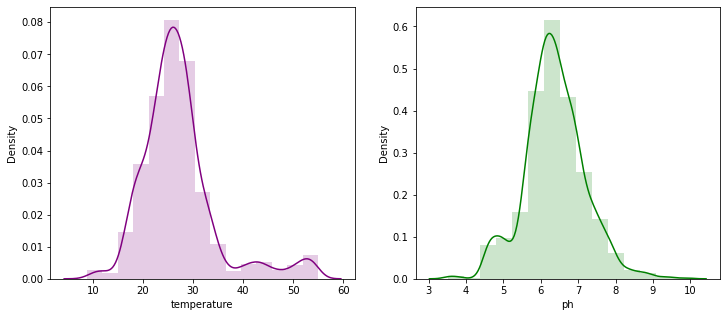

In [ ]:
plt.figure(figsize=(12,5))
plt.subplot(1, 2, 1)

sns.distplot(df_yield['temperature'],color="purple",bins=15,hist_kws={'alpha':0.2})
plt.subplot(1, 2, 2)
sns.distplot(df_yield['ph'],color="green",bins=15,hist_kws={'alpha':0.2})

In [ ]:

#A quick check if the dataset is balanced or not. If found imbalanced,
#we would have to downsample some targets which are more in quantity but so far everything looks good!

<Axes: xlabel='count', ylabel='label'>

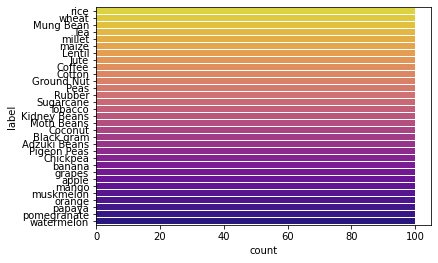

In [ ]:
sns.countplot(y='label',data=df_yield, palette="plasma_r")

In [ ]:
#A very important plot to visualize the diagonal distribution between two features for all the combinations!
#It is great to visualize how classes differ from each other in a particular space.

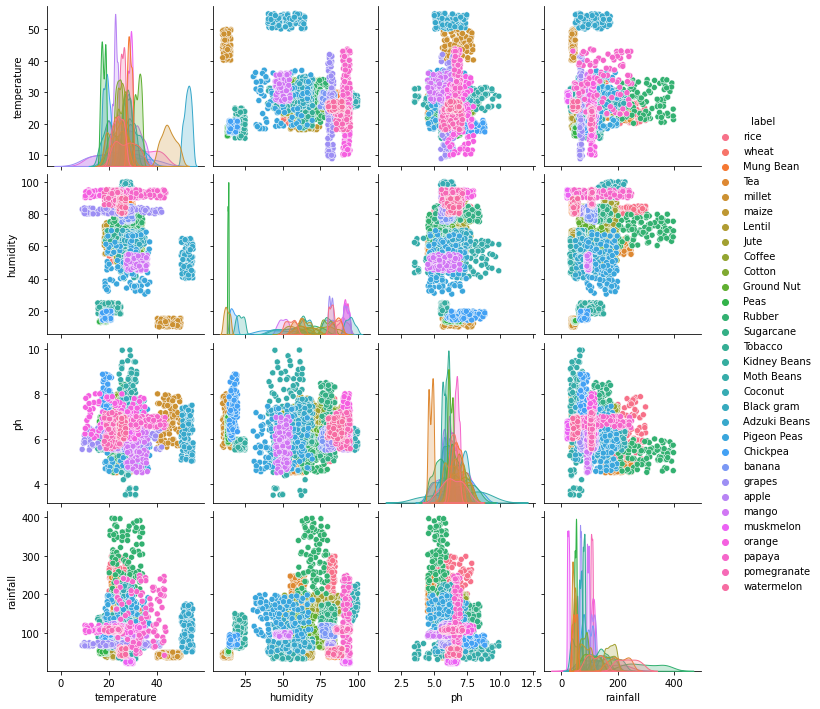

In [ ]:
sns.pairplot(df_yield, hue = 'label')

In [ ]:
#During rainy season, average rainfall is high (average 120 mm) and temperature is mildly chill (less than 30'C).
#Rain affects soil moisture which affects ph of the soil. Here are the crops which are likely to be planted during this season.
#Rice needs heavy rainfall (>200 mm) and a humidity above 80%. No wonder major rice production in India comes from East Coasts which has average of 220 mm rainfall every year!
#Coconut is a tropical crop and needs high humidity therefore explaining massive exports from coastal areas around the country.

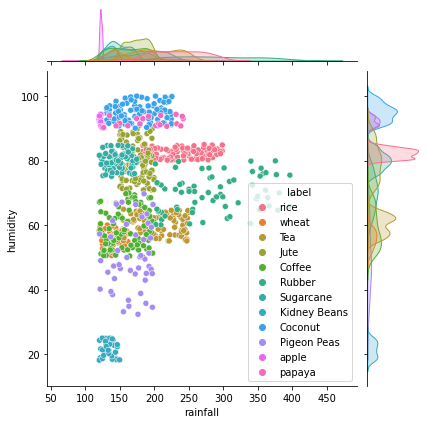

In [ ]:
sns.jointplot(x="rainfall",y="humidity",data=df_yield[(df_yield['temperature']<30) & (df_yield['rainfall']>120)],hue="label")

In [ ]:
#This graph correlates with average potassium (K) and average nitrogen (N) value (both>50).
#These soil ingredients direcly affects nutrition value of the food.
#Fruits which have high nutrients typically has consistent potassium values

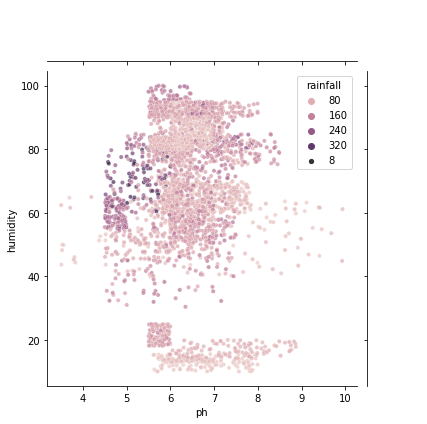

In [ ]:
#sns.jointplot() can be used for bivariate analysis to plot between humidity and ph levels based on Label type.
#It further generates frequency distribution of classes with respect to features


sns.jointplot(x="ph",y="humidity",data=df_yield,hue='rainfall',size=8,s=30,alpha=0.7)

In [ ]:
#We can see ph values are critical when it comes to soil. A stability between 6 and 7 is preffered

<Axes: xlabel='ph', ylabel='label'>

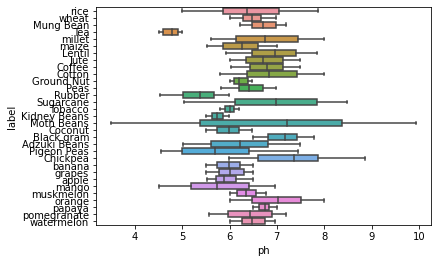

In [ ]:
sns.boxplot(y='label',x='ph',data=df_yield)

In [ ]:
#Another interesting analysis where rainfall levels are quite differentiable when it rains heavily (above 150 mm)

<Axes: xlabel='rainfall', ylabel='label'>

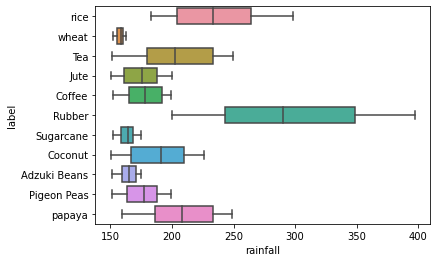

In [ ]:
sns.boxplot(y='label',x='rainfall',data=df_yield[df_yield['rainfall']>150])

In [ ]:

#When humidity is less than 65,
#area required for 6 crops which could be grown just based on the amount of rain expected over the next few weeks.

<Axes: xlabel='humidity', ylabel='rainfall'>

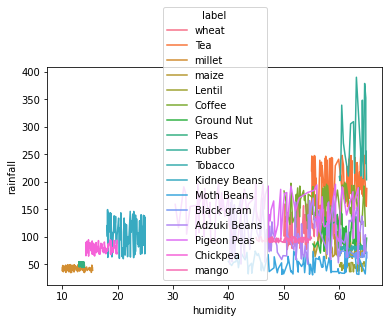

In [ ]:
sns.lineplot(data = df_yield[(df_yield['humidity']<65)], x = "humidity", y = "rainfall",hue="label")

In [ ]:
#DATA PRE-PROCESSING
#Let's make the data ready for machine learning model

In [ ]:
c=df_yield.label.astype('category')
targets = dict(enumerate(c.cat.categories))
df_yield['target']=c.cat.codes

y=df_yield.target
X=df_yield[['temperature','humidity','ph','rainfall']]

<Axes: >

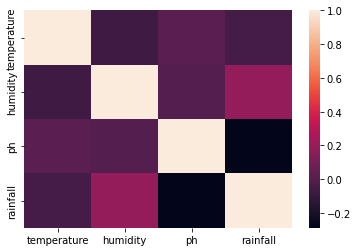

In [ ]:
sns.heatmap(X.corr())

In [ ]:
#FEATURE SCALING
#Feature scaling is required before creating training data and feeding it to the model.

#As we saw earlier,
#two of our features (temperature and ph) are gaussian distributed, therefore scaling them between 0 and 1 with MinMaxScaler.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=1)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)

# we must apply the scaling to the test set as well that we are computing for the training set
X_test_scaled = scaler.transform(X_test)
print(X_test)
print(y_test)



      temperature   humidity        ph    rainfall
796     23.928879  88.071123  6.880205  154.660874
1351    29.519208  75.748117  5.382771  168.396173
2239    29.148272  78.710248  6.390742  117.536781
2816    38.441872  93.637390  6.544030   77.715669
99      23.359054  83.595123  5.333323  188.413665
...           ...        ...       ...         ...
957     24.412123  80.803438  6.281914   98.604574
1126    17.515463  13.405113  6.579192   48.509743
1673    28.764890  52.627415  7.792508   55.216067
1863    28.474423  63.536045  6.500145   69.527441
893     23.292503  50.045570  6.020947  183.468585

[775 rows x 4 columns]
796      7
1351    15
2239    19
2816    26
99      28
        ..
957      5
1126    12
1673    10
1863     1
893      4
Name: target, Length: 775, dtype: int8


In [ ]:
#MODEL SELECTION
#KNN Classifier for Crop prediction.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_train_scaled, y_train)
knn.score(X_test_scaled, y_test)


0.8735483870967742

<Axes: >

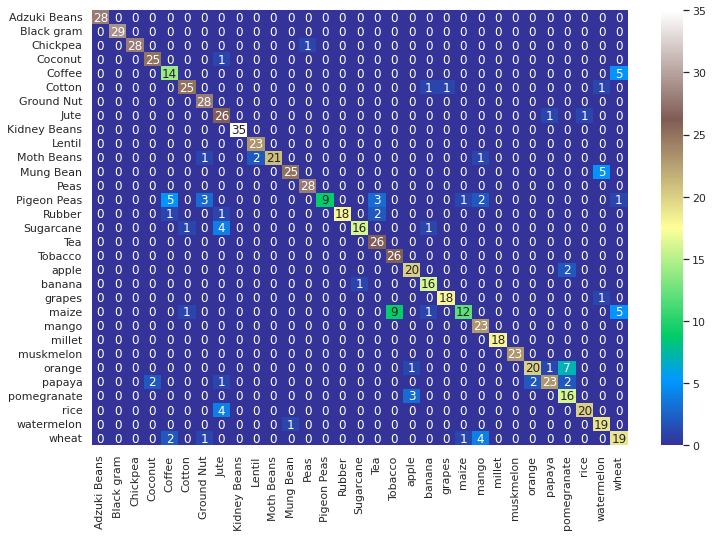

In [ ]:
#confusion matrix
from sklearn.metrics import confusion_matrix
mat=confusion_matrix(y_test,knn.predict(X_test_scaled))
df_cm = pd.DataFrame(mat, list(targets.values()), list(targets.values()))
sns.set(font_scale=1.0) # for label size
plt.figure(figsize = (12,8))
sns.heatmap(df_cm, annot=True, annot_kws={"size": 12},cmap="terrain")

In [ ]:
#Let's try different values of n_neighbors to fine tune and get better results

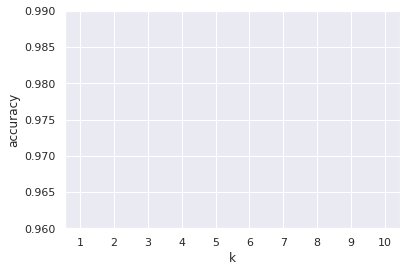

In [ ]:
k_range = range(1,11)
scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train_scaled, y_train)
    scores.append(knn.score(X_test_scaled, y_test))

plt.xlabel('k')
plt.ylabel('accuracy')
plt.scatter(k_range, scores)
plt.vlines(k_range,0, scores, linestyle="dashed")
plt.ylim(0.96,0.99)
plt.xticks([i for i in range(1,11)]);

In [ ]:
#Classification using Support Vector Classifer (SVC)
#In SVM Classification, the data can be either linear or non-linear. There are different kernels that can be set in an SVM Classifier.
#For a linear dataset, we can set the kernel as 'linear'.
#On the other hand, for a non-linear dataset, there are two kernels, namely 'rbf' and 'polynomial'.
from sklearn.svm import SVC

svc_linear = SVC(kernel = 'linear').fit(X_train_scaled, y_train)
print("Linear Kernel Accuracy: ",svc_linear.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'rbf').fit(X_train_scaled, y_train)
print("Rbf Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

svc_poly = SVC(kernel = 'poly').fit(X_train_scaled, y_train)
print("Poly Kernel Accuracy: ", svc_poly.score(X_test_scaled,y_test))

Linear Kernel Accuracy:  0.6903225806451613
Rbf Kernel Accuracy:  0.8309677419354838
Poly Kernel Accuracy:  0.847741935483871


In [ ]:
#Classifying using decision tree

#Decision Tree algorithm uses a data structure called a tree to predict the outcome of a particular problem.
#Since the decision tree follows a supervised approach,
#the algorithm is fed with a collection of pre-processed data. This data is used to train the algorithm
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=42).fit(X_train, y_train)
clf.score(X_test,y_test)

0.927741935483871

In [ ]:
#Let's visualize the import features which are taken into consideration by decision trees.

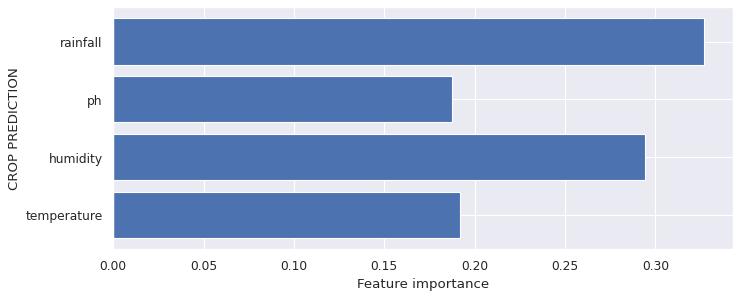

In [ ]:
plt.figure(figsize=(10,4), dpi=80)
c_features = len(X_train.columns)
plt.barh(range(c_features), clf.feature_importances_)
plt.xlabel("Feature importance")
plt.ylabel("CROP PREDICTION")
plt.yticks(np.arange(c_features), X_train.columns)
plt.show()

In [ ]:
#Classification using Random Forest.
#random forest classifier can be used to solve for regression or classification problems.
#The random forest algorithm is made up of a collection of decision trees,
#and each tree in the ensemble is comprised of a data sample drawn from a training set with replacement, called the bootstrap sample.
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(max_depth=4,n_estimators=100,random_state=42).fit(X_train, y_train)

print('RF Accuracy on training set: {:.2f}'.format(clf.score(X_train, y_train)))
print('RF Accuracy on test set: {:.2f}'.format(clf.score(X_test, y_test)))

RF Accuracy on training set: 0.73
RF Accuracy on test set: 0.70


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


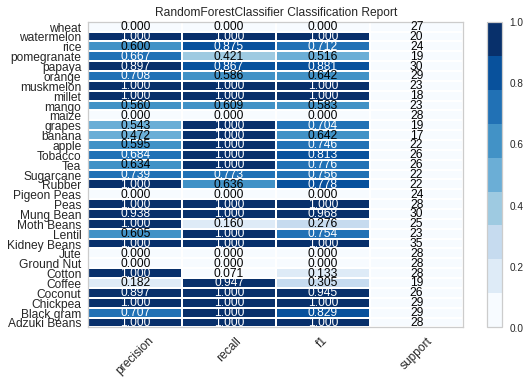

<Axes: title={'center': 'RandomForestClassifier Classification Report'}>

In [ ]:
#Classification report
from yellowbrick.classifier import ClassificationReport
classes=list(targets.values())
visualizer = ClassificationReport(clf, classes=classes, support=True,cmap="Blues")

visualizer.fit(X_train, y_train)  # Fit the visualizer and the model
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()